행복 예측


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
#df = pd.read_clipboard() # 데이터 드래그 + ctrl + C

In [16]:
#/ 파일 다운 로드/ 엑셀
df = pd.read_excel('../happiness.xlsx')

In [18]:
df.head()

,맑음지수,미세먼지정도,Youtube시청시간(h),쉬는날?,작업진행잘됨?,맛있는식사,행복지수
너굴맨이 처리함,99,50,4,1,50,80,88
OHmygodkimchi,80,80,2,0,50,100,63
OHmybackkimchi,90,50,1,1,70,30,70
OHmygodanan-a-ki,30,80,5,0,85,44,80
Park,30,30,1,0,95,100,90


In [26]:
#누락 갯수 
df.isnull().sum().sum()

0

In [27]:
#유효성 검사
(df < 0).sum().sum()

0

In [33]:
df.corr() # 상관관계 1:상관있음, 0:상관없음, -1:음의상관있음 

,맑음지수,미세먼지정도,Youtube시청시간(h),쉬는날?,작업진행잘됨?,맛있는식사,행복지수
맑음지수,1.000000,-0.016246,0.196877,0.054029,0.074477,0.503027,0.195411
미세먼지정도,-0.016246,1.000000,0.011971,-0.298306,-0.299184,-0.101656,-0.328178
Youtube시청시간(h),0.196877,0.011971,1.000000,-0.356586,-0.248312,-0.043289,0.359052
쉬는날?,0.054029,-0.298306,-0.356586,1.000000,0.318821,0.040042,0.364067
작업진행잘됨?,0.074477,-0.299184,-0.248312,0.318821,1.000000,0.458281,0.660947
맛있는식사,0.503027,-0.101656,-0.043289,0.040042,0.458281,1.000000,0.344156
행복지수,0.195411,-0.328178,0.359052,0.364067,0.660947,0.344156,1.000000


선형 회귀 모델을 사용해서 '행복지수' 를 타겟으로 학습시키세요.
- 테스트셋을 나눌 필요 없습니다
- 결정계수로 성능을 측정합니다
- 계수의 값을 출력해서 계수의 의미를 생각해 봅니다
- 정답과 예측을 그래프로 비교해봅니다

In [51]:
np.set_printoptions(3, suppress=True)

In [54]:
df.columns

Index(['맑음지수', '미세먼지정도', 'Youtube시청시간(h)', '쉬는날? ', '작업진행잘됨?', '맛있는식사',
       '행복지수'],
      dtype='object')

In [52]:
x = df.drop('행복지수', axis=1)
y = df['행복지수']
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x, y)
model.coef_

array([ -0.042,  -0.013,   2.692,  21.426,   0.786,   0.063])

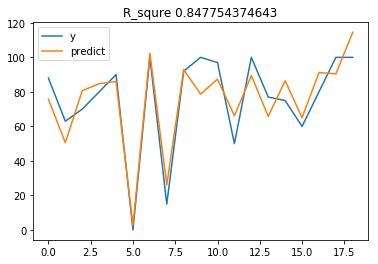

In [53]:
plt.title('R_squre '+str(model.score(x, y)))
plt.plot(y.values, label='y')
plt.plot(model.predict(x), label='predict')
plt.legend()

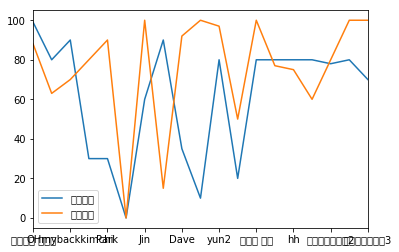

In [31]:
df[['맑음지수','행복지수']].plot()

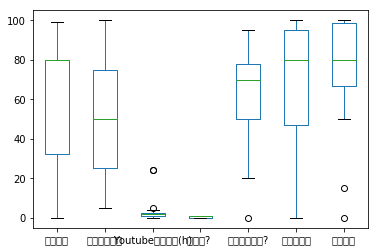

In [29]:
%matplotlib inline
df.plot.box()